# Online Sales Analysis


# Project Objectives:

1.Performing Data Cleaning and manipulation.
2.Performing EDA using pandas,matplotlib and seaborn libraries
3.Improve customer experience by identifying potential customers across different states,occupation,gender and age groups.
4.Improve sales by identifying most selling product categories and products, which will help to plan inventory and hence meet the demands.


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
df=pd.read_csv(r'C:\Users\HP\Documents\Python Scripts\Online Sales Analysis/Diwali Sales Data.csv', encoding='unicode_escape')

In [150]:
#Finding the sum of null values in each column
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [152]:
df.shape

(11251, 15)

In [153]:
#droping blank columns from the data set
#inplace = True, saves the changes made ie it saves the column that is deleted
#axis =1 means the whole column 0 means row
df.drop(['Status','unnamed1'], axis=1,inplace=True)

In [154]:
df.info()
#Blank column is droped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [155]:
#(11251no of rows,13no of columns)
df.shape

(11251, 13)

In [156]:
df.dropna(inplace=True)

In [157]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [158]:
df['Amount'].unique()

array([23952., 23934., 23924., ...,   213.,   206.,   188.])

In [159]:
df['Amount']=df['Amount'].astype(int)

In [160]:
df['Amount'].dtype

dtype('int32')

In [161]:
#Rename column, if inplace=True is added in the below code, the changes will be saved else not.
df.rename(columns = {'Marital_Status':'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [162]:
#describe() method returns description of the data in the dataframe ie count,mean,std,etc
df.describe()
df['Age'].describe()
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender

<Axes: xlabel='Gender', ylabel='count'>

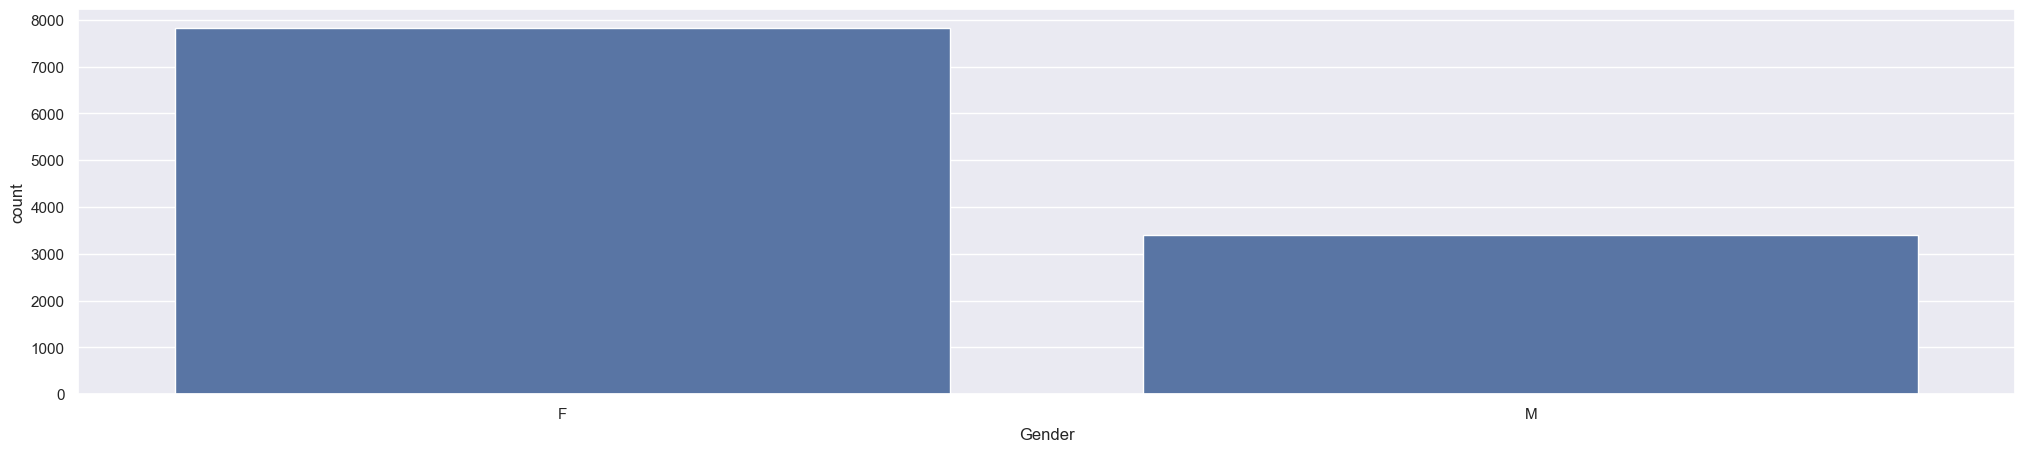

In [163]:
#Countplot using seaborn
sns.countplot(x='Gender', data=df)

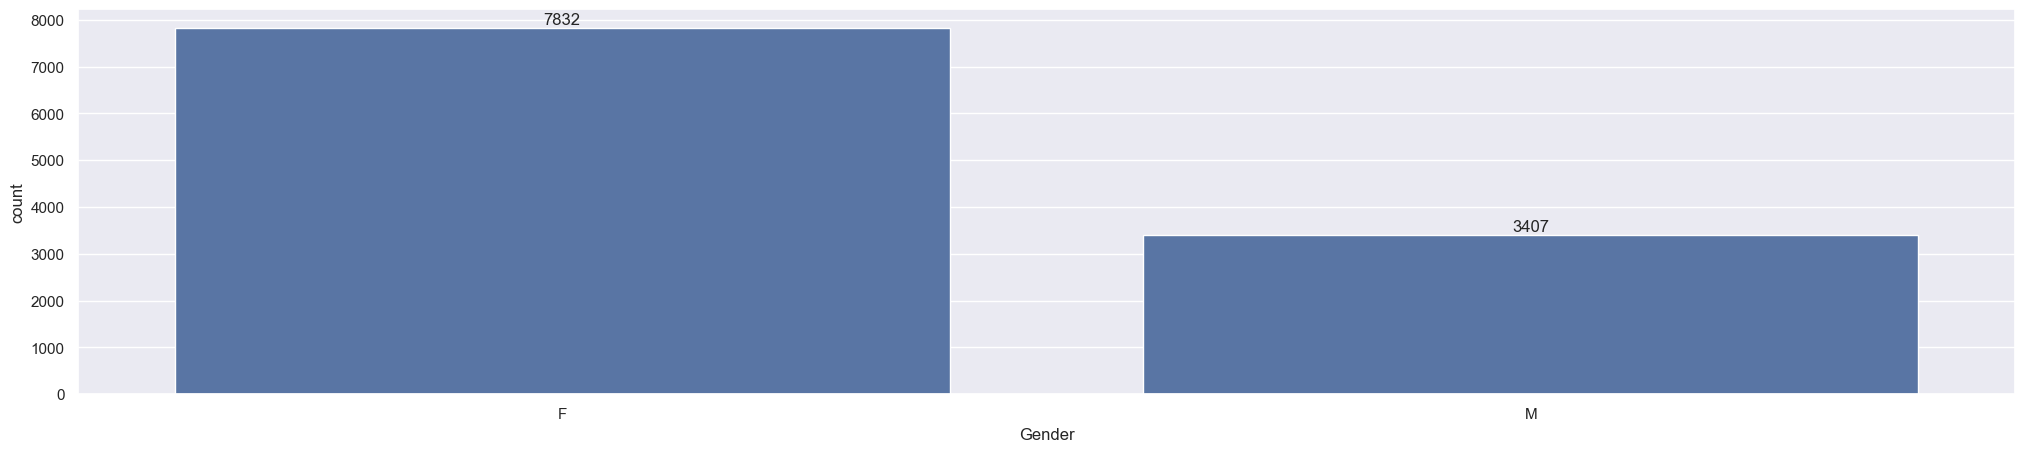

In [164]:
#To get the total count of male and female, refer below code snip
ex=sns.countplot(x='Gender',data=df)
for bars in ex.containers:
    ex.bar_label(bars)

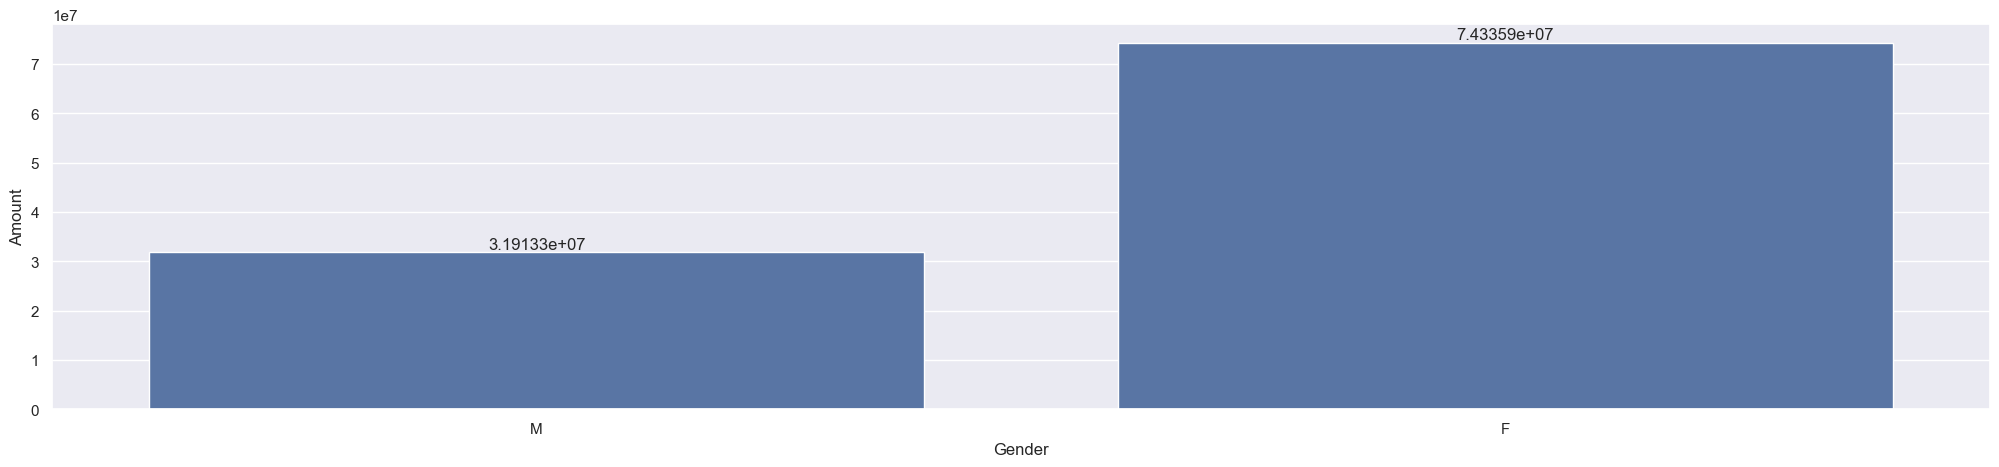

In [165]:
sales_amount = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=True)
ex=sns.barplot(x='Gender',y='Amount',data=sales_amount)
for bars in ex.containers:
   ex.bar_label(bars)

# sales_amount

From the above graph we can conclude that the purchase amount of Female is higher compare to Male.

# Age

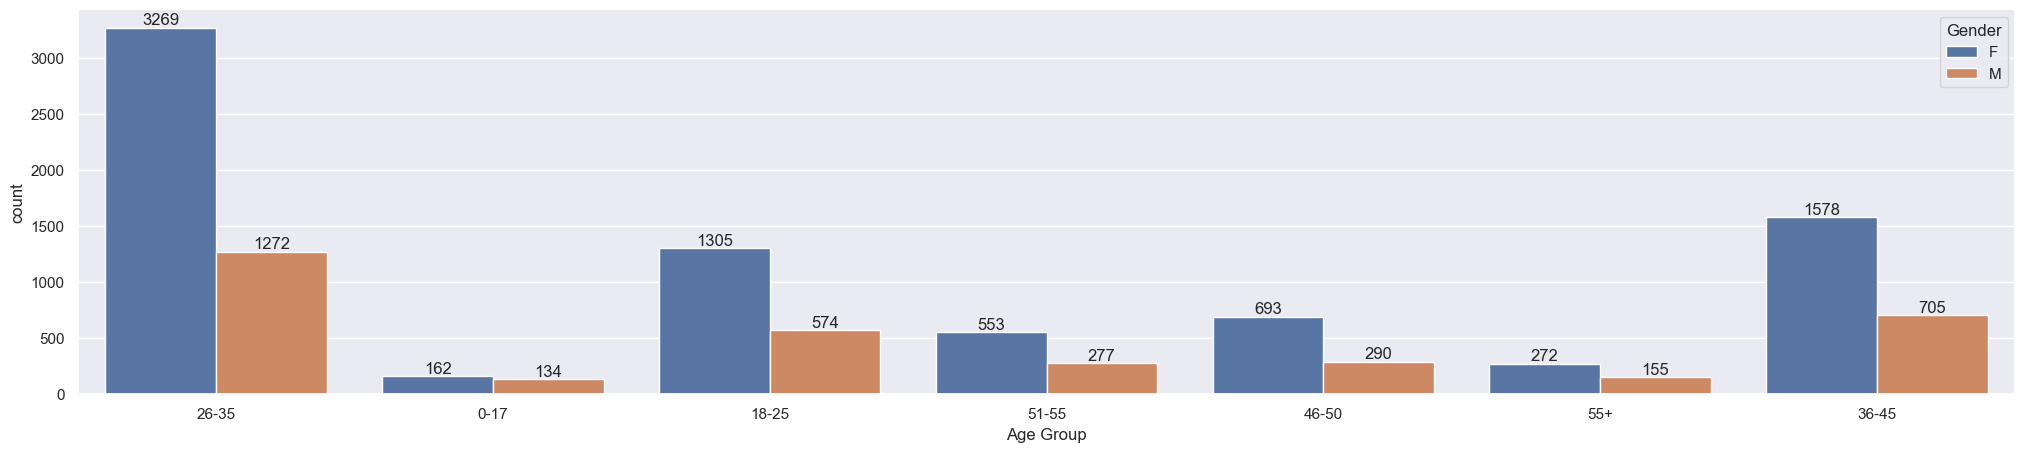

In [166]:
ax=sns.countplot(x='Age Group', data=df, hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

Age Group of 26-35 have done highest shopping, while the lowest shopping is done by 0-17
In all the age groups the highest purchase is done by Female

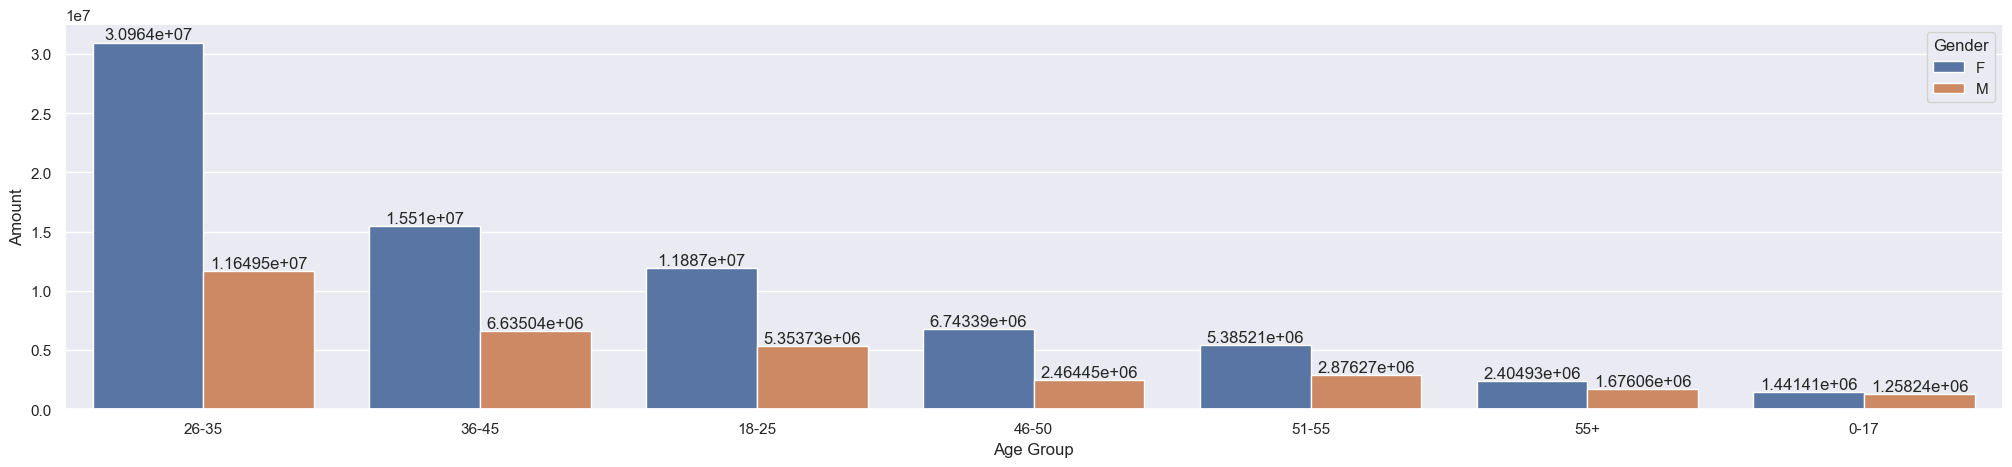

In [167]:
sales_amount = df.groupby(['Age Group','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax=sns.barplot(x='Age Group',y='Amount', data=sales_amount,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

In [168]:
datas.sort_values(by='Amount',ascending=False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


The above graph gives us the Total Amount of Purchase made wrt Age Group

# State

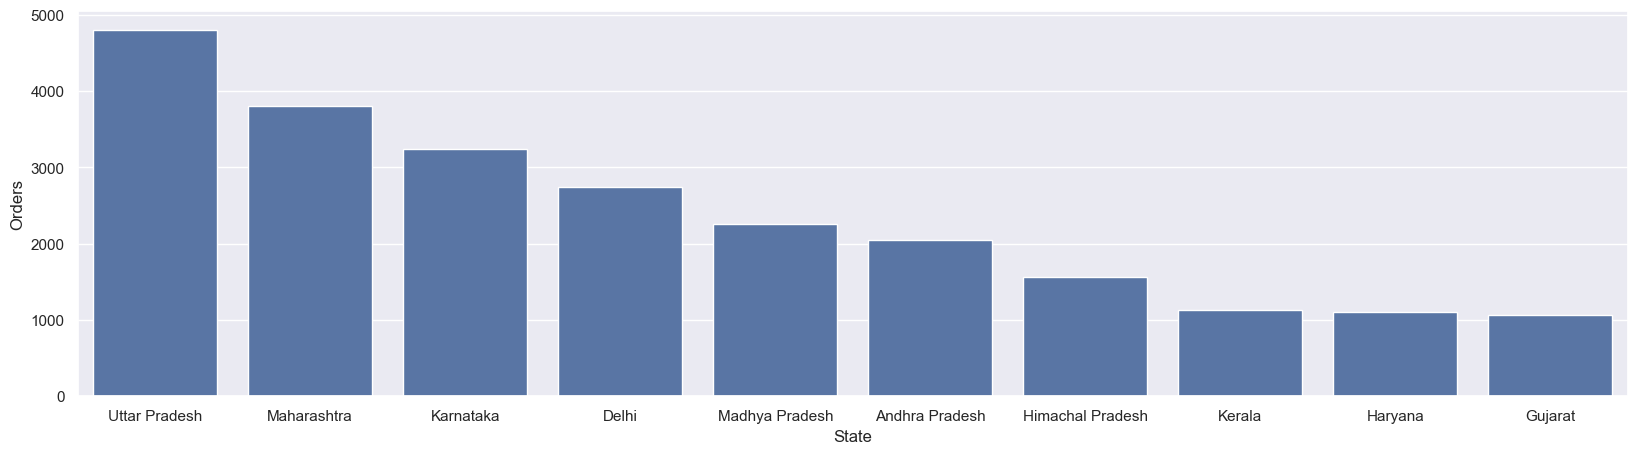

In [169]:
states_orders=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x='State',y='Orders',data=states_orders)

UP is the Highest ordering state

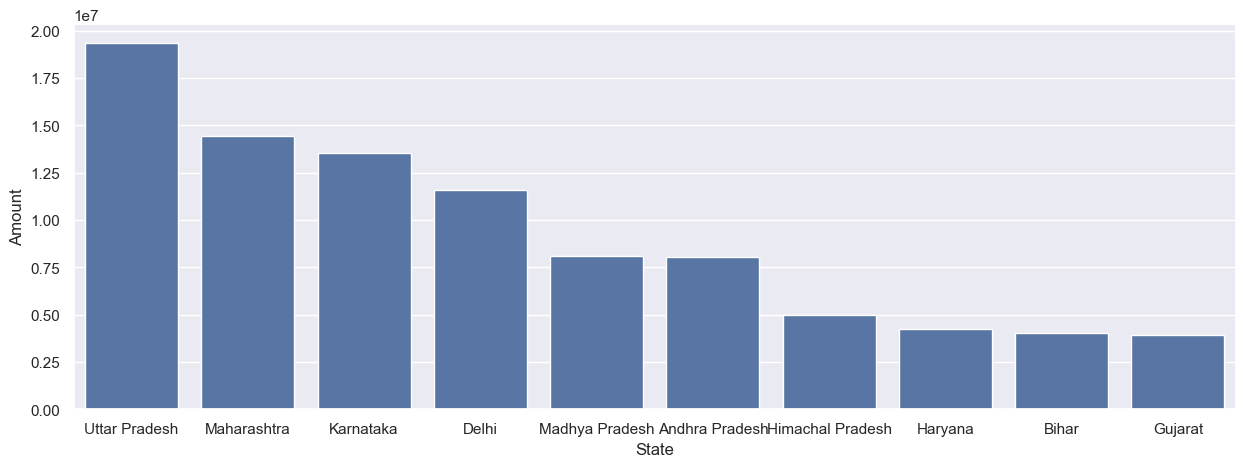

In [170]:
states_Amount=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(x='State',y='Amount',data=states_Amount)

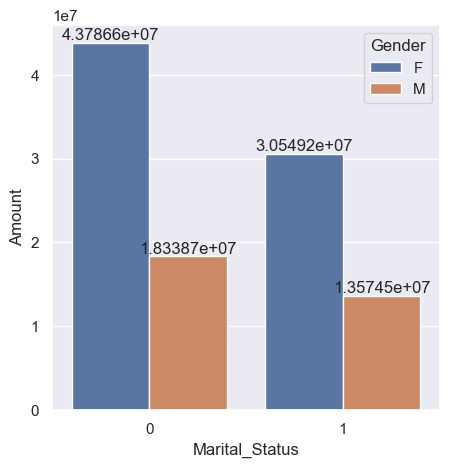

In [171]:
sales_married=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales_married)
for bars in ax.containers:
    ax.bar_label(bars)

Married Women have purchased the highest

# Occupation

<Axes: xlabel='Occupation', ylabel='Amount'>

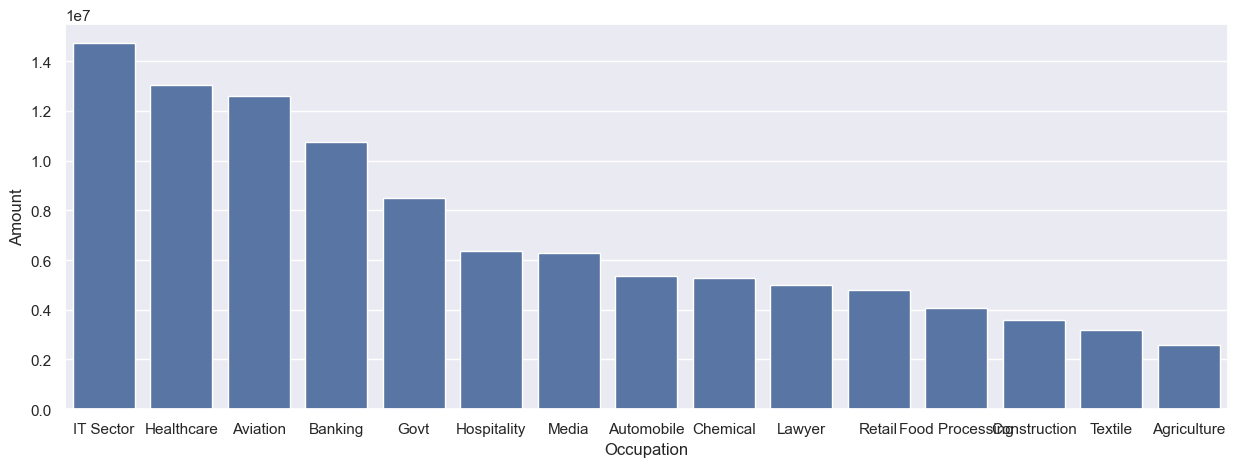

In [172]:
sales_occupation=df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_occupation)

IT sector has shopped the highest.followed by Aviationa and Healthcare.


<Axes: xlabel='Product_Category', ylabel='Amount'>

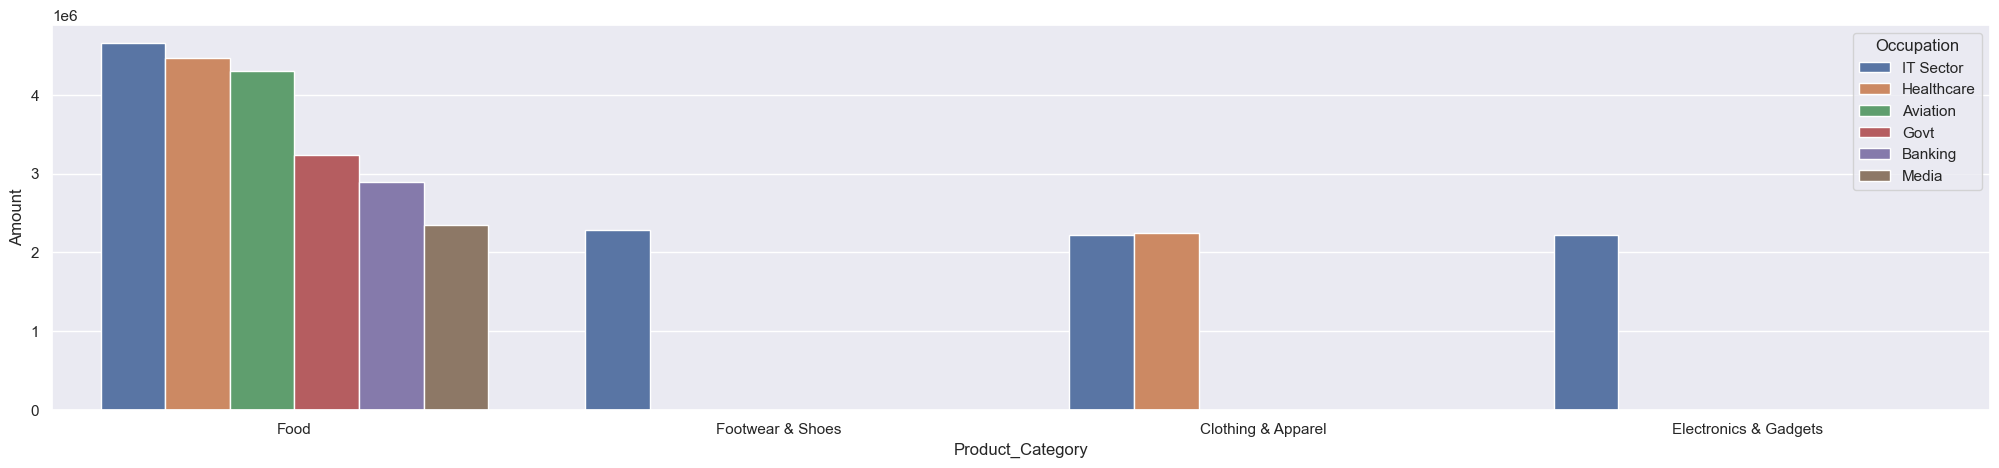

In [173]:
sales_catogory=df.groupby(['Product_Category','Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Product_Category',y='Amount',hue='Occupation', data=sales_catogory)

LArgest amount of sales is by Food Category.

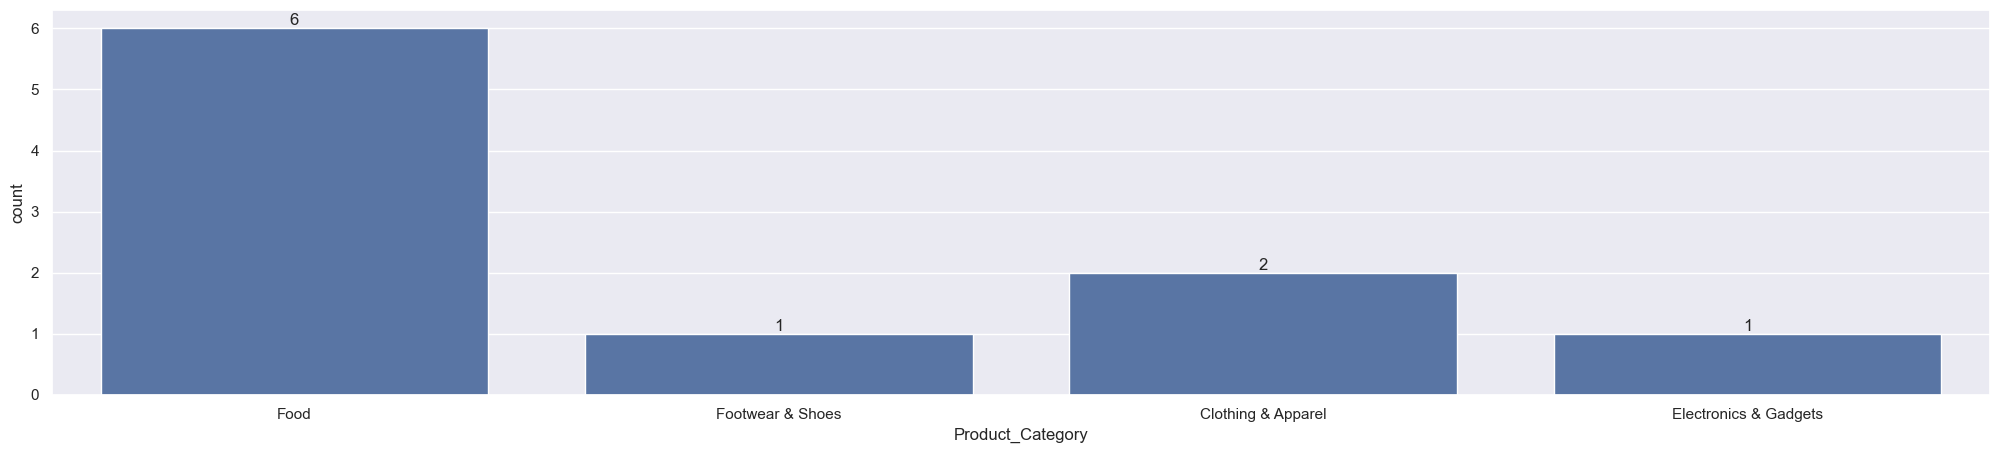

In [174]:
ax=sns.countplot(x='Product_Category',data=sales_catogory)
for bars in ax.containers:
    ax.bar_label(bars)

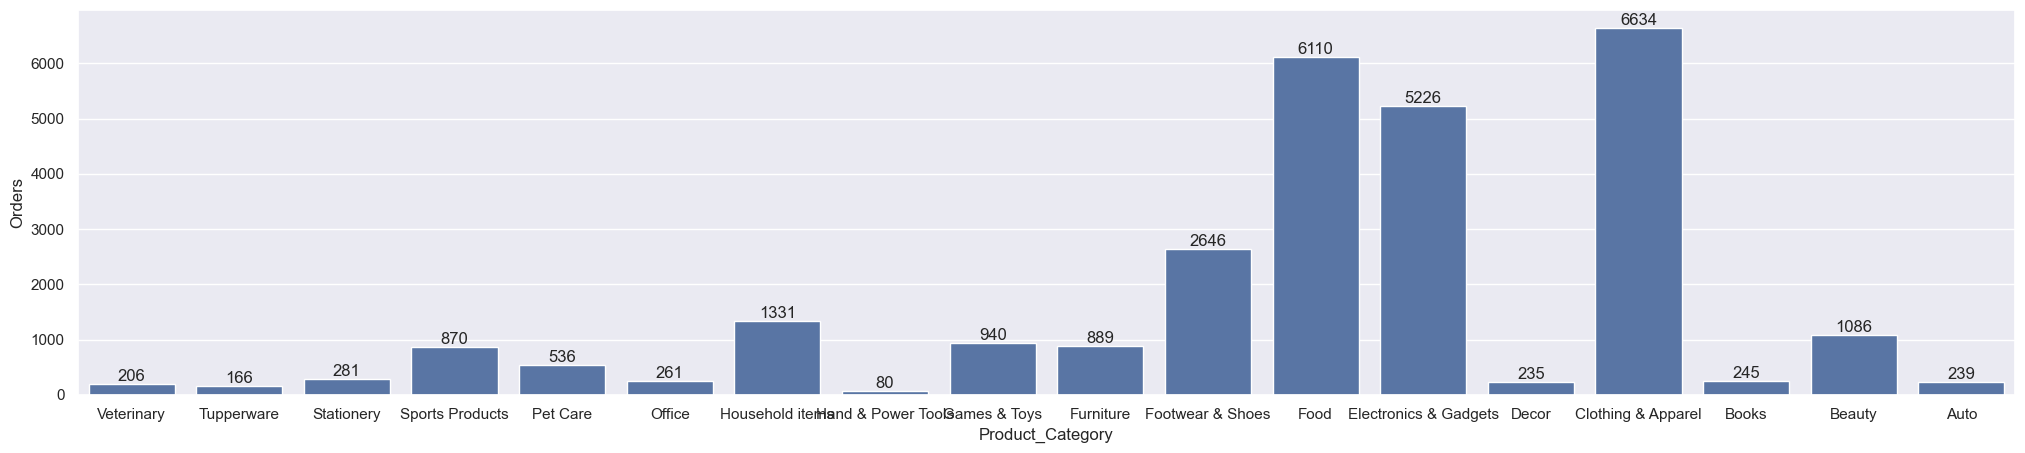

In [175]:
sales_productsorders=df.groupby('Product_Category',as_index=False)['Orders'].sum().sort_values(by='Product_Category',ascending=False)
ax=sns.barplot(x='Product_Category',y='Orders',data=sales_productsorders)
for bars in ax.containers:
    ax.bar_label(bars)
    

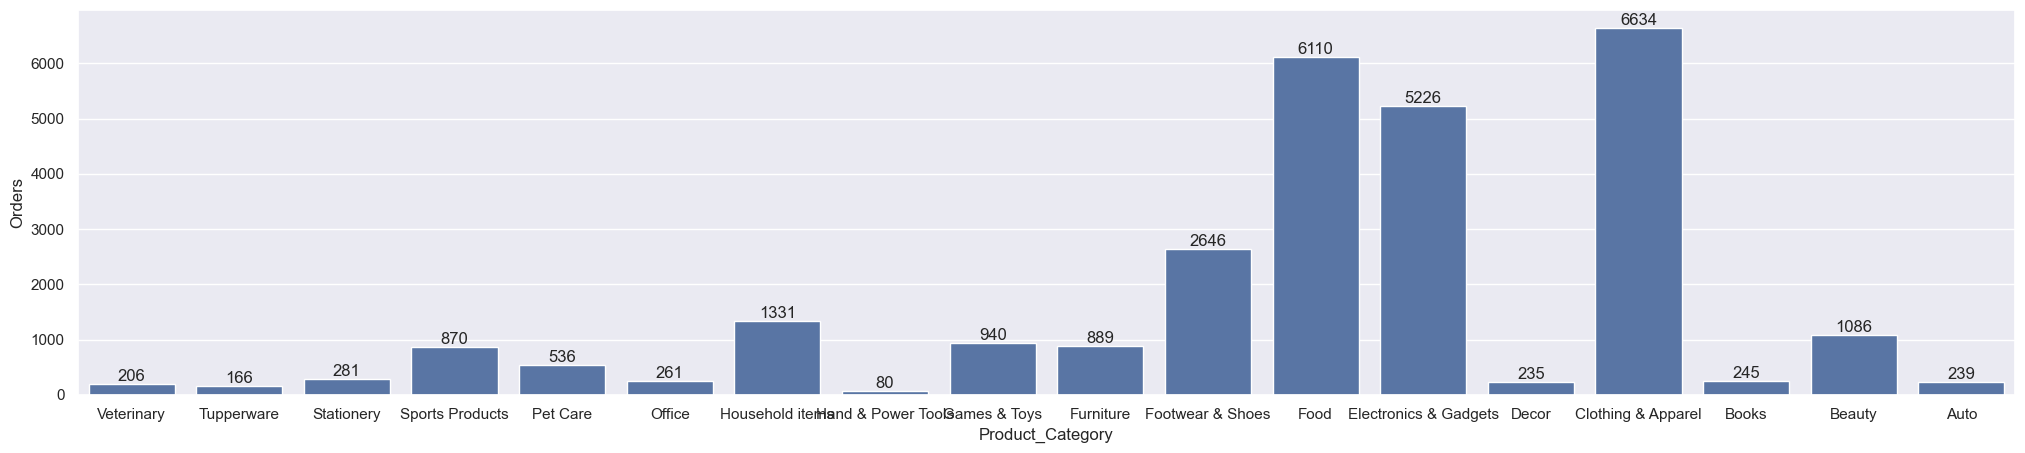

In [176]:
sales_productsorders=df.groupby('Product_Category',as_index=False)['Orders'].sum().sort_values(by='Product_Category',ascending=False)
ax=sns.barplot(x='Product_Category',y='Orders',data=sales_productsorders)
for bars in ax.containers:
    ax.bar_label(bars)

# Conclusion
Married Women from the age group 25-35 years from UP,Maharastra and Karnataka State working in IT, HEalthcare and Aviation are more likely to buy products from Food,Clothing and Electronics Category.